# 1. 
**Encuentre un dominio V ⊂ C que incluye todo el conjunto de Mandelbrot. Justifiquen por qué este dominio contiene todo el fractal.**

Se entiende que un número complejo pertenece al conjunto si y sólo si |xₙ| < 2 para todo n. En este sentido, el valor absoluto debe encontrarse dentro de o ser igual a 2, para mantenerse en el conjunto, manteniendose acotado en un disco de radio 2 centrado en el origen.

Dado lo anterior, podemos definir el dominio V como dominio circular de radio 2 centrado en el origen.

V = {c ∈ C | |c| <= 2}

Así, este dominio incluye toda la región donde se encuentra el conjunto de Mandelbrot debido a que cualquier número complejo con una magnitud mayor que 2 hará que la secuencia diverga. Por lo tanto, elegir un círculo de radio 2 garantiza que todos los puntos del conjunto de Mandelbrot están incluidos

# 2
**Programe el método de pixel counting**

Para la resolución de este ítem, me basaré en el resumen del algoritmo entregado en el enunciado.

In [20]:
import numpy as np
import matplotlib.pyplot as plt

class PixelCounting:
    def __init__(self, m, k):
        self.m = m
        self.k = k
        self.radio = 2
        self.areas = []

    def generar_puntos_aleatorios(self):
        """ 
        Generar m puntos aleatorios complejos que se encuentren en el dominio V:
        Se crean los números complejos a partir de la representación a + 1j * b.
        
        Returns:
            x: Array de números complejos de tamaño m.
        """
        angulos = np.random.uniform(0, 2 * np.pi, self.m)
        radios = np.sqrt(np.random.uniform(0, self.radio**2, self.m))
        parte_real = radios * np.cos(angulos)
        parte_imaginaria = radios * np.sin(angulos)
        x = parte_real + 1j * parte_imaginaria
        return x

    def estima_area(self):
        """
        Estima el área del conjunto
        No retorna nada
        """
        self.c = self.generar_puntos_aleatorios()
        x = np.zeros(self.m, dtype=complex)
        self.areas = self.calcular_aproximaciones(x)

    def estimacion_final(self):
        """
        Obtiene la estimación final del conjunto Mandelbrot.

        Returns:
            area: Float del área estimada después de k estimaciones
        """
        if not self.areas:
            self.estima_area()
        area = self.areas[-1]
        return area

    def calcular_aproximaciones(self, x):
        """
        Calcula las aproximaciones del área en cada iteración, verificando 
        cuáles puntos permanecen acotados.

        Args:
            x: Array de números complejos de tamaño m.
        
        Returns:
            areas: Lista de aproximaciones de área en cada iteración
        """
        areas = []
        for k in range(1, self.k + 1):
            x = x**2 + self.c
            contador = np.sum(np.abs(x) < 2)
            area_aproximada = contador / self.m * (np.pi * self.radio**2)
            areas.append(area_aproximada)
        return areas

    def visualizar_aproximaciones(self):
        """
        Visualiza con Matplotlib la convergencia de las aproximaciones.

        No retorna nada, genera el gráfico
        """
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, self.k + 1), self.areas, color='blue', linestyle='-')
        plt.xlabel('Iteraciones (k)')
        plt.ylabel('Aproximación del área')
        plt.title('Convergencia de las aproximaciones de área')
        plt.grid(True)
        plt.show()

In [21]:
# Cantidad de m puntos aleatorios
m = 1000

# Número de iteraciones
k = 100

In [22]:
estimacion = PixelCounting(m, k)
area_estimada = estimacion.estimacion_final()
print(f"El área estimada con {m} puntos aleatorios es {area_estimada}")

El área estimada con 1000 puntos aleatorios es 1.4953981031087415


C:\Users\vbele\AppData\Local\Temp\ipykernel_8320\380557888.py:60: RuntimeWarning: overflow encountered in square
  x = x**2 + self.c
C:\Users\vbele\AppData\Local\Temp\ipykernel_8320\380557888.py:60: RuntimeWarning: invalid value encountered in square
  x = x**2 + self.c


# 3
**Visualize con Matplotlib la convergencia de las aproximaciones. Es decir, en una figura con k en el eje horizontal y las aproximaciones en el eje vertical, para un m grande.**

Dada la instancia anterior, tendríamos m = 1000 puntos aleatorios.

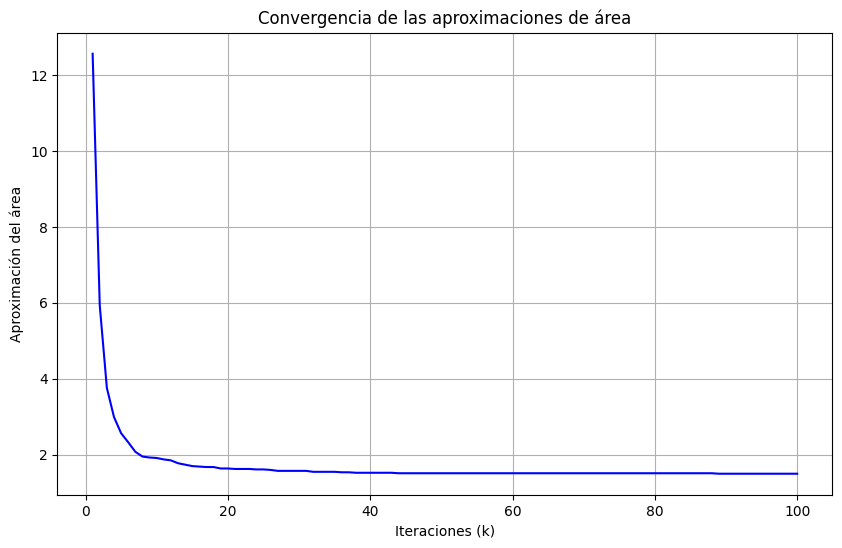

In [23]:
estimacion.visualizar_aproximaciones()

En este gráfico, vemos la convergencia de las aproximaciones del área del conjunto a medida que aumenta el número de iteraciones. 

# 4
**No se conoce el valor exacto del área, pero las estimaciones comúnes dicen 1,506. Calcule la diferencia con tu estimación y justifique si tu algoritmo es correcto.**

In [24]:
estimacion_comun = 1.506
diferencia = abs(estimacion_comun - area_estimada)

print(f"La diferencia entre el área estimada y el valor común es: {diferencia:.4f}")

La diferencia entre el área estimada y el valor común es: 0.0106


La diferencia entre la estimación proporcionada por la clase PixelCounting con el valor comúnmente aceptado 1.506 se puede deber por:

Número de Iteraciones (k): Aumentar el número de iteraciones puede mejorar la precisión de la estimación.

Número de Puntos Aleatorios (m): Aumentar la cantidad de puntos aleatorios también puede mejorar la precisión.

En este sentido, con 100 iteraciones (k) y 1000 puntos aleatorios (m), obtuvimos una diferencia pequeña, lo que nos proporciona una buena aproximación del área del conjunto.

Si deseamos aumentar estos valores, notamos una mayor precisión, aproximandonos cada vez mas al valor 1,506.

In [25]:
# Cantidad de m puntos aleatorios
m = 1000000

# Número de iteraciones
k = 1000

estimacion = PixelCounting(m, k)
area_estimada = estimacion.estimacion_final()
print(f"El área estimada con {m} puntos aleatorios es {area_estimada}")

C:\Users\vbele\AppData\Local\Temp\ipykernel_8320\380557888.py:60: RuntimeWarning: overflow encountered in square
  x = x**2 + self.c
C:\Users\vbele\AppData\Local\Temp\ipykernel_8320\380557888.py:60: RuntimeWarning: invalid value encountered in square
  x = x**2 + self.c


El área estimada con 1000000 puntos aleatorios es 1.508115270170473


In [26]:
diferencia = abs(estimacion_comun - area_estimada)

print(f"La diferencia entre el área estimada y el valor común es: {diferencia:.4f}")

La diferencia entre el área estimada y el valor común es: 0.0021


Utilizando una mayor cantidad de puntos aleatorios y un mayor numero de iteraciones, notamos que la diferencia disminuye. 

# 5
**Visualize el conjunto de MandelBrot en el plano complejo.**

A partir de esta última instancia visualizaré el conjunto.

C:\Users\vbele\AppData\Local\Temp\ipykernel_8320\380557888.py:60: RuntimeWarning: overflow encountered in square
  x = x**2 + self.c
C:\Users\vbele\AppData\Local\Temp\ipykernel_8320\380557888.py:60: RuntimeWarning: invalid value encountered in square
  x = x**2 + self.c
C:\Users\vbele\AppData\Local\Temp\ipykernel_8320\4030710.py:6: RuntimeWarning: overflow encountered in square
  x = x**2 + estimacion.c
C:\Users\vbele\AppData\Local\Temp\ipykernel_8320\4030710.py:6: RuntimeWarning: invalid value encountered in square
  x = x**2 + estimacion.c


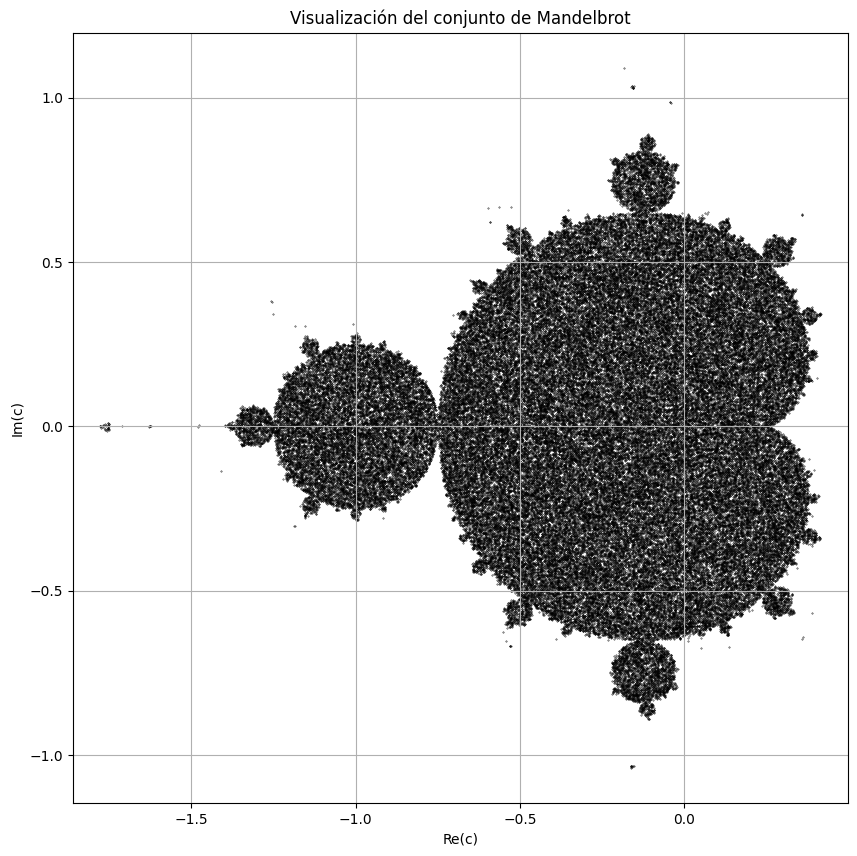

In [27]:
estimacion.estima_area()

# los puntos c que cumplen |x| < 2
x = np.zeros(m, dtype=complex)
for _ in range(k):
    x = x**2 + estimacion.c
puntos_acotados = estimacion.c[np.abs(x) < 2]

# visualizar los puntos c acotados
plt.figure(figsize=(10, 10))
plt.scatter(puntos_acotados.real, puntos_acotados.imag, color='black', s=0.1)
plt.xlabel('Re(c)')
plt.ylabel('Im(c)')
plt.title('Visualización del conjunto de Mandelbrot')
plt.axis('equal')
plt.grid(True)
plt.show()